In [1]:
import numpy as np
from epcsaftpy import component, pcsaft
import matplotlib.pyplot as plt
from epcsaftpy.helmholtz_scaling import viscosity_mix

In [2]:
cycC6 = component("cyclohexane", ms = 2.5303, sigma = 3.8499, eps = 278.11, Mw = 84.16, 
                viscosity_parameters = [0.5358, -1.0134, -0.25142547, -0.00178330, -0.0004466065]) 
C6 = component("n-hexane", ms = 3.0576, sigma = 3.7983, eps = 236.77, Mw = 86.18, 
                viscosity_parameters = [0.5034, -1.2065, -0.23042591, -0.00211177, -0.00014090]) 
mix = cycC6 + C6  
eos = pcsaft(mix)

In [3]:
from pandas import read_excel

Dexp = read_excel('data_exp/cyclohexane_with_c6.xlsx', 'mix1')
T    = np.array(Dexp.iloc[:,0])         # K
x1exp= np.array(Dexp.iloc[:,1])
rho  = np.array(Dexp.iloc[:,2])*1e-3    # g cm-3
visc = np.array(Dexp.iloc[:,3])         # mPa s

In [4]:
P = 1.01325e5
Tset = list(set(T.tolist()))                       # Identify the different temperature             
nT = len(Tset)
x10 = 0
x1f = 1

n = 100                                            # Number of points
x1vec = np.linspace(x10, x1f, n)
Ph_cal  = np.zeros([n, nT])                        # Vector to save the information
rhoh_cal  = np.zeros([n, nT])                      # Vector to save the information
visch_cal  = np.zeros([n, nT])                     # Vector to save the information
label = []
for i in range(nT): 
    label.append("T = " + str(Tset[i]))
    for j in range(n):
        x = np.array([x1vec[j], 1 - x1vec[j]])
        rhocal = eos.density(x, Tset[i], P, "L") # Solving the density
        rhoh_cal[j, i] = rhocal * np.dot(x, eos.Mw)
        visch_cal[j, i] = viscosity_mix(x, rhocal, Tset[i], eos)
rhoh_cal *= 1e-6

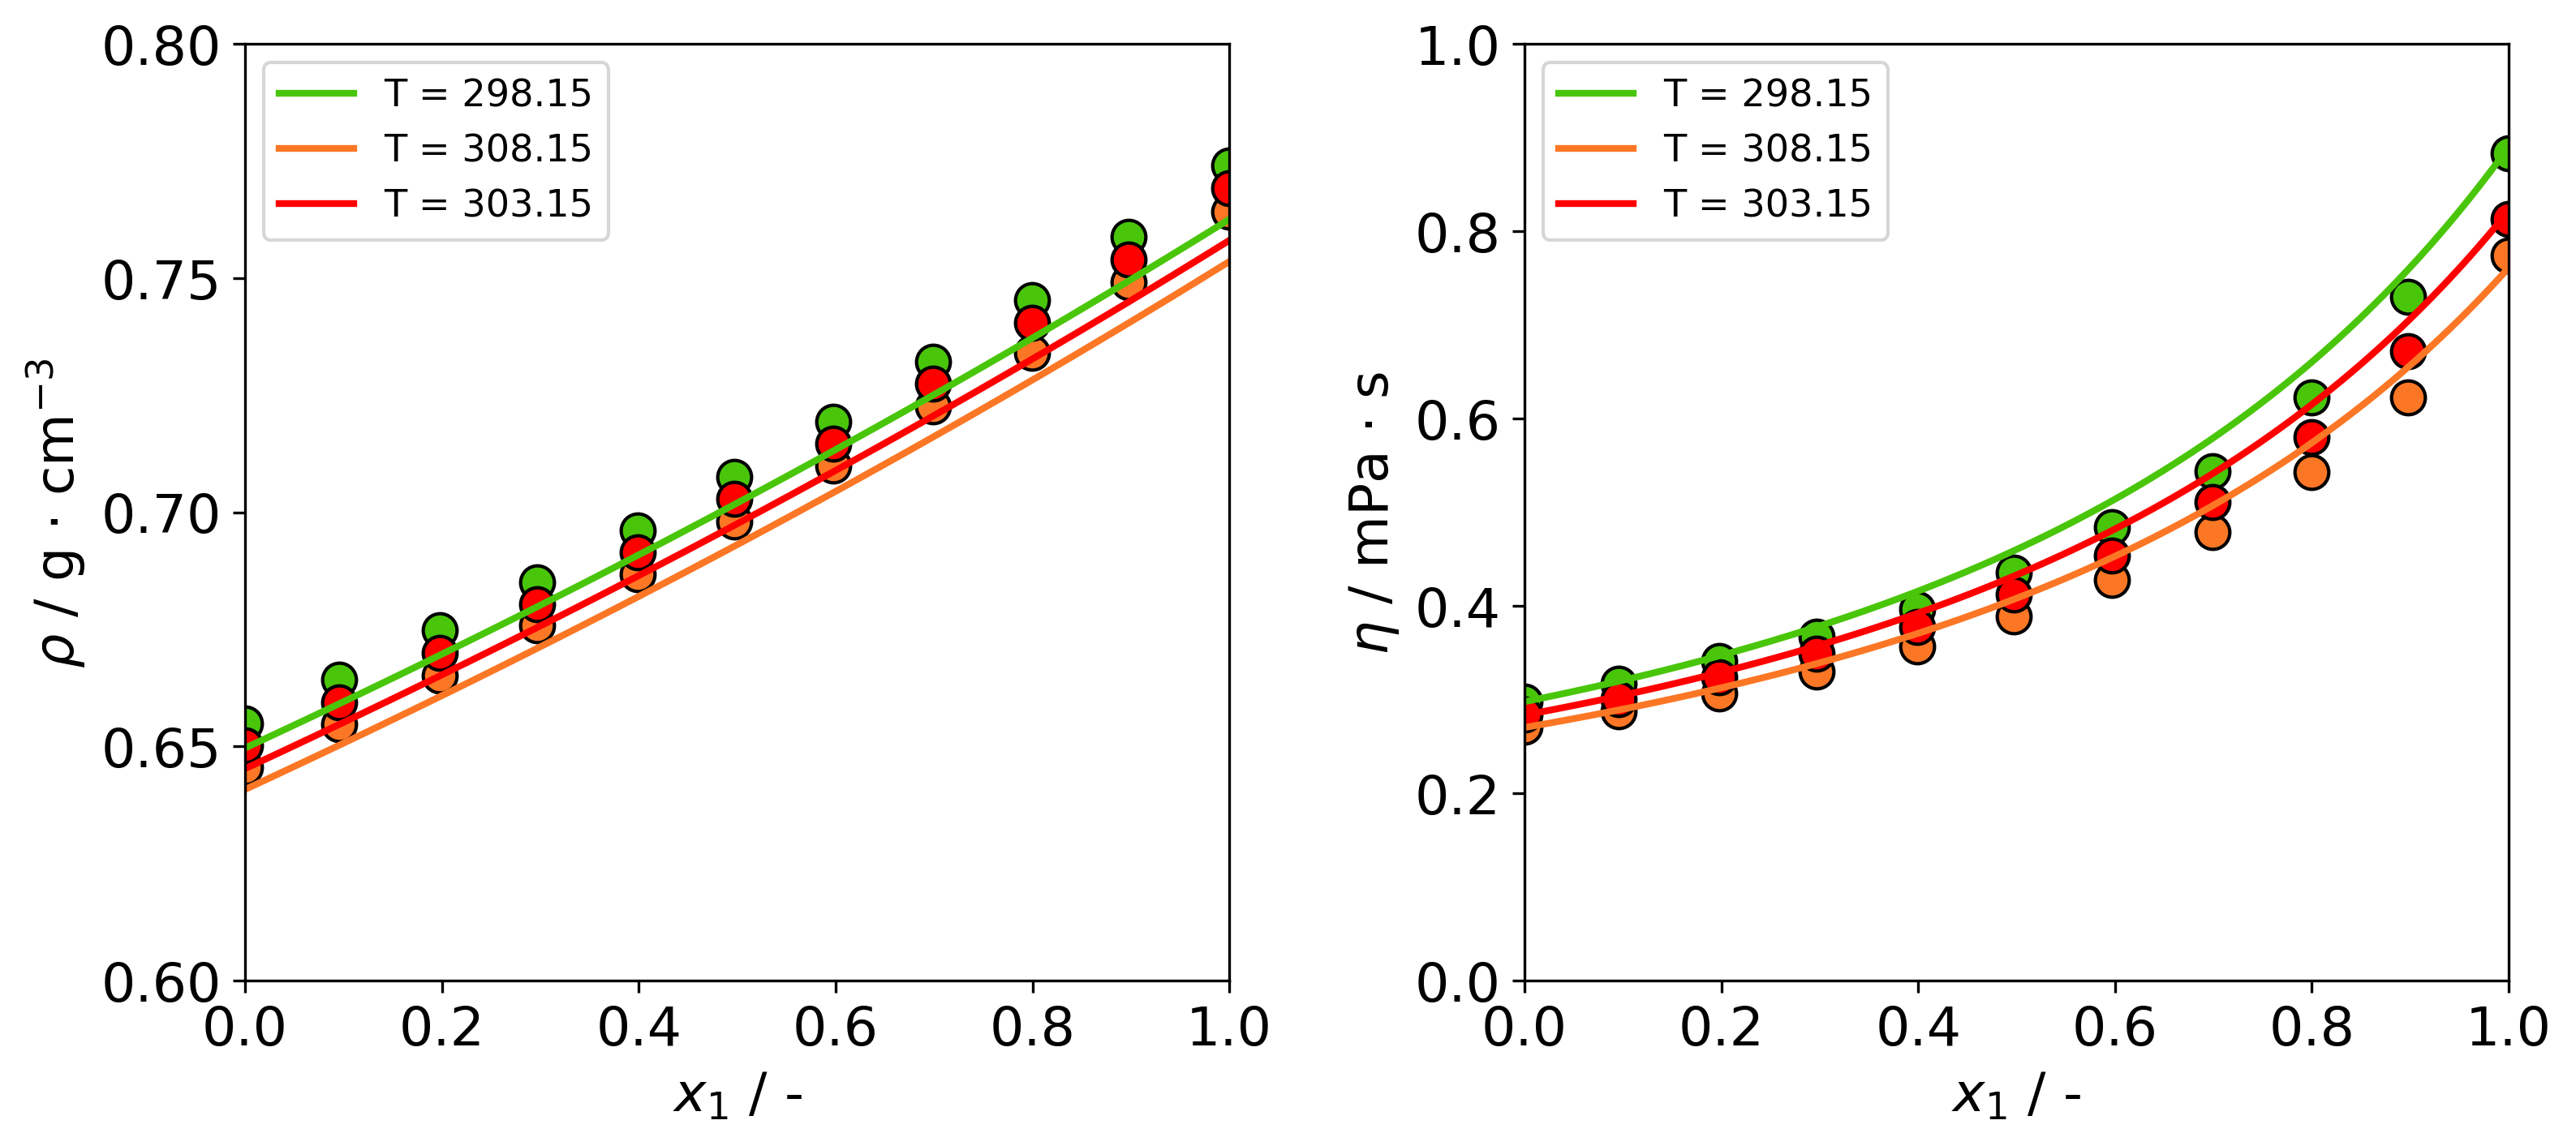

In [5]:
font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)


color1 = "#49C60A"
color2 = "#FC7725"
color3 = "r"
color4 = "b"
color5 = "y"

colors = [color1, color2, color3, color4, color5]


fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax = axs[0]
for i in range(nT):
        ax.plot(x1vec, rhoh_cal[:, i], linewidth = 2.0, label = label[i], c = colors[i])
        index = T == Tset[i]
        ax.scatter(x1exp[index], rho[index], s = 100, marker="o", c = colors[i], 
                   linewidth=1.0, edgecolor='k')



ax.set_xlabel('$x_1$ / -')
ax.set_ylabel(r'$\rho$ / g $\cdot$ cm$^{-3}$')
ax.axis([0, 1, 0.6, 0.8])



ax.legend(fontsize = "x-small")

ax = axs[1]
for i in range(nT):
        ax.plot(x1vec, visch_cal[:, i], linewidth = 2.0, label = label[i], c = colors[i])
        index = T == Tset[i]
        ax.scatter(x1exp[index], visc[index], s = 100, marker="o", c = colors[i], 
                   linewidth=1.0, edgecolor='k')


ax.axis([0, 1, 0, 1.])

ax.set_xlabel('$x_1$ / -')
ax.set_ylabel(r'$\eta$ / mPa $\cdot$ s')




ax.legend(fontsize = "x-small")

plt.show()